In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


## Load the dataset

In [3]:
df=pd.read_csv("D:\\ICT_DataScience\\Excel worksheet\\force2020_data.csv")
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


## Basic information

In [7]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [9]:
df.dtypes

RHOB        float64
GR          float64
DEPTH_MD    float64
NPHI        float64
PEF         float64
DTC         float64
dtype: object

In [11]:
df.shape

(18270, 6)

## Summarize the data

In [14]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


## Missing values

In [17]:
df.isna().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [19]:
import seaborn as sns 

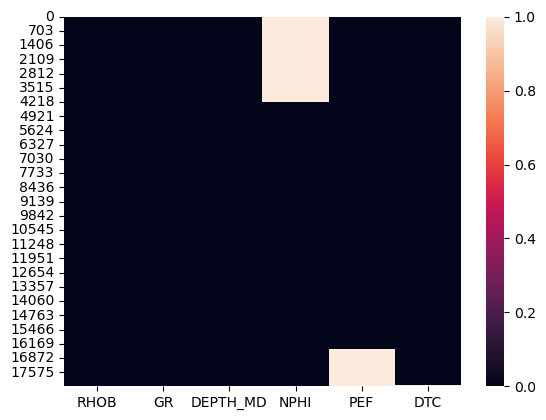

In [20]:
sns.heatmap(df.isna()) 
plt.show()

## splitting numerical and categorical columns

In [22]:
num_df=df.select_dtypes('number') 
cat_df=df.select_dtypes('object')

In [23]:
num_cols=num_df.columns.tolist()
cat_cols=cat_df.columns.tolist()
print("Numerical columns :",num_cols) 
print("categorical columns:",cat_cols)

Numerical columns : ['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC']
categorical columns: []


## Filling missing values for numerical columns

In [25]:
for col in num_cols:
    num_df[col]=num_df[col].fillna(num_df[col].median()) 
num_df[col].median()

141.30046082

In [26]:
num_df.isna().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

## Correlation

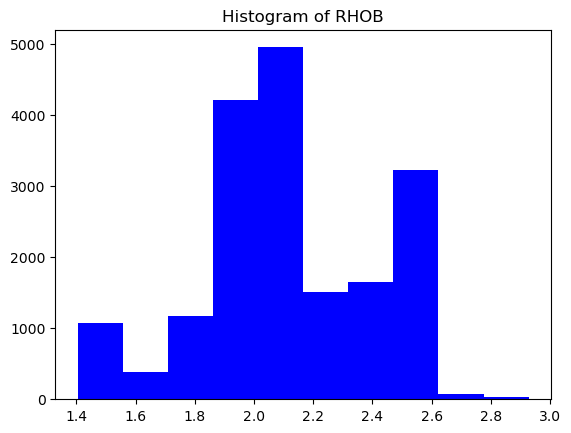

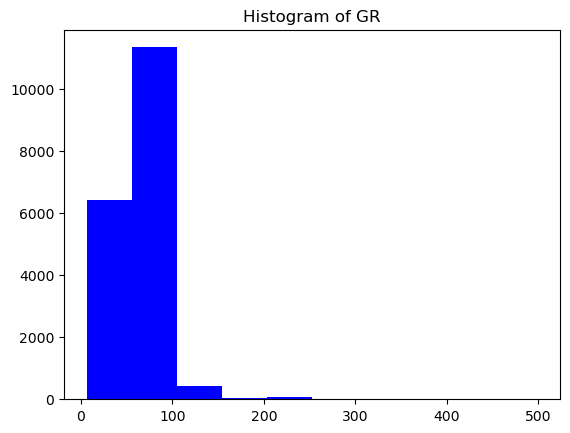

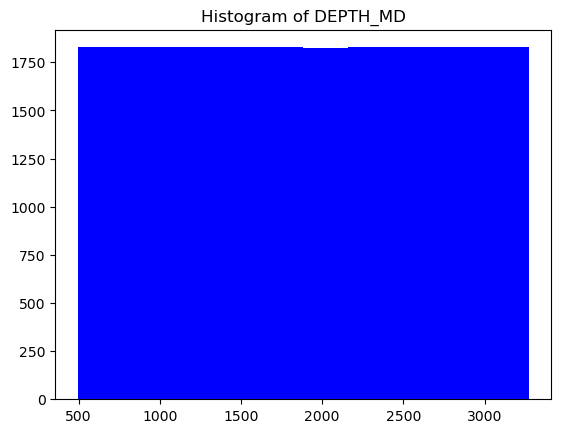

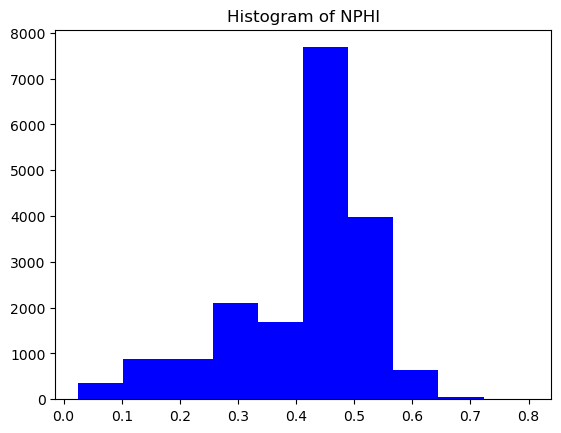

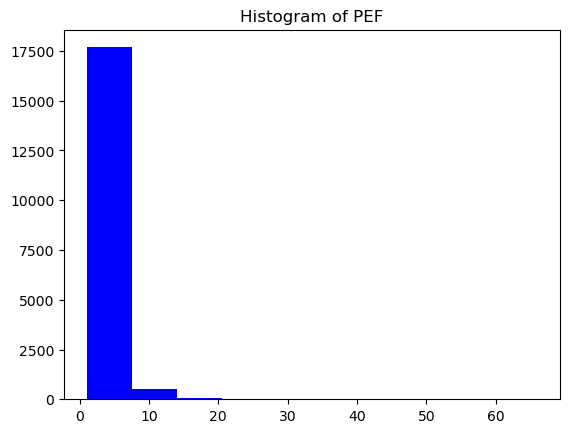

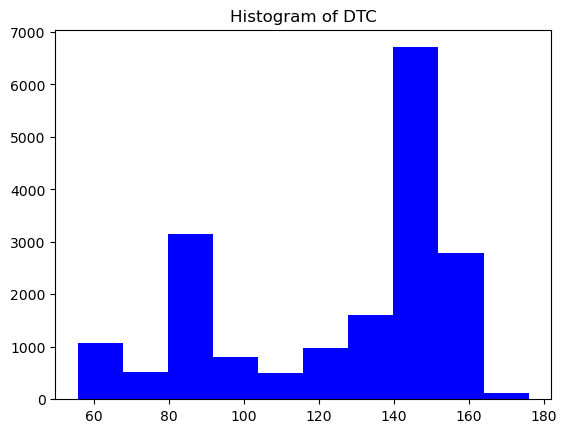

In [29]:
for col in num_cols: 
    plt.hist(num_df[col],color='b')
    plt.title(f"Histogram of {col}")
    plt.show()

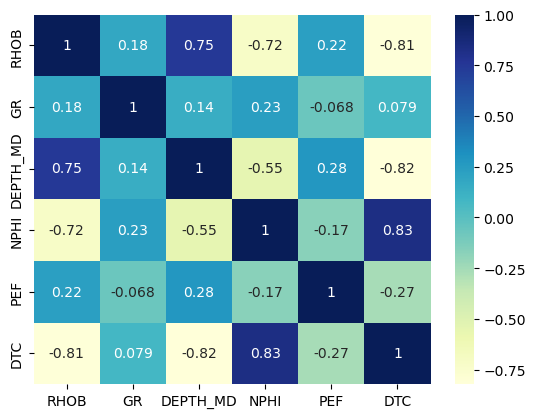

In [35]:
sns.heatmap(num_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

## Outlier handling

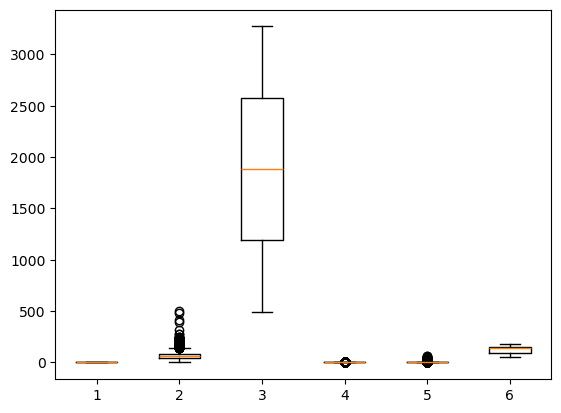

In [37]:
plt.boxplot(num_df) 
plt.show()

In [41]:
def replace_outliers(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75) 
    IQR=Q3-Q1
    upper_bound=Q3+1.5*IQR 
    lower_bound=Q1-1.5*IQR
    df[column]=df[column].clip(upper=upper_bound) 
    df[column]=df[column].clip(lower=lower_bound) 
    return df[column]

In [43]:
for col in num_cols: 
    num_df[col]=replace_outliers(num_df,col)

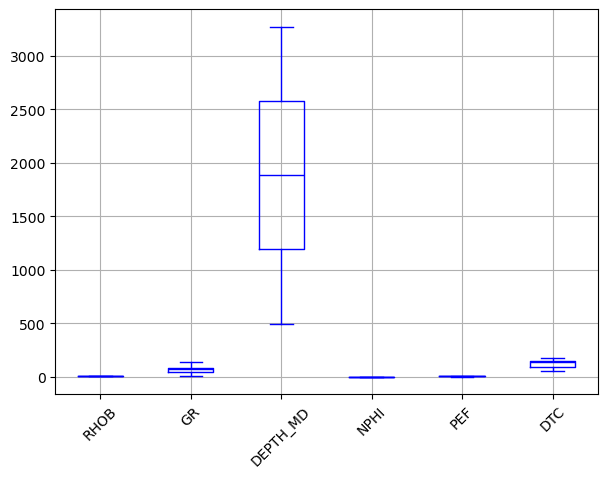

In [45]:
plt.figure(figsize=(7,5)) 
num_df.boxplot(color='b') 
plt.xticks(rotation=45) 
plt.show()

## Try K-Means Clustering on the data and visualize the output

### K-means clustering on RHOB and GR

In [49]:
df.fillna(df.mean(), inplace=True)

In [51]:
X=df[['RHOB','GR']] 
X.head()

,RHOB,GR
0,1.884186,80.200851
1,1.889794,79.262886
2,1.896523,74.821999
3,1.891913,72.878922
4,1.880034,71.729141


In [53]:
from sklearn.cluster import KMeans

In [54]:
WCSS=[] 
for i in range(1,11): 
    Kmeans=KMeans(n_clusters=i,init='k-means++',
                  max_iter=300,n_init=10,random_state=0) 
    Kmeans.fit(X) 
    WCSS.append(Kmeans.inertia_)

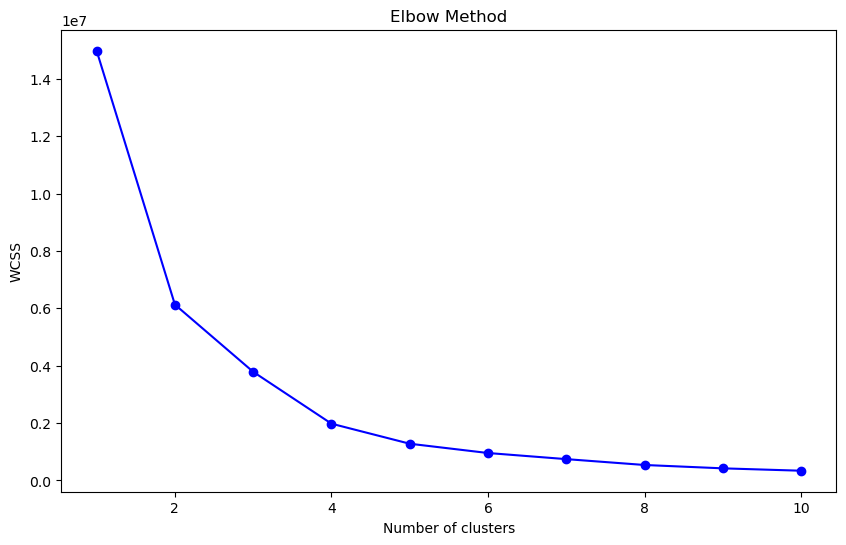

In [56]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),WCSS,marker='o',color='b')
plt.title("Elbow Method")
plt.xlabel("Number of clusters") 
plt.ylabel("WCSS") 
plt.show()

In [59]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [61]:
df['cluster 1']=y_kmeans 
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,cluster 1
0,1.884186,80.200851,494.528,0.404547,20.915468,161.131180,1
1,1.889794,79.262886,494.680,0.404547,19.383013,160.603470,1
2,1.896523,74.821999,494.832,0.404547,22.591518,160.173615,2
3,1.891913,72.878922,494.984,0.404547,32.191910,160.149429,2
4,1.880034,71.729141,495.136,0.404547,38.495632,160.128342,2


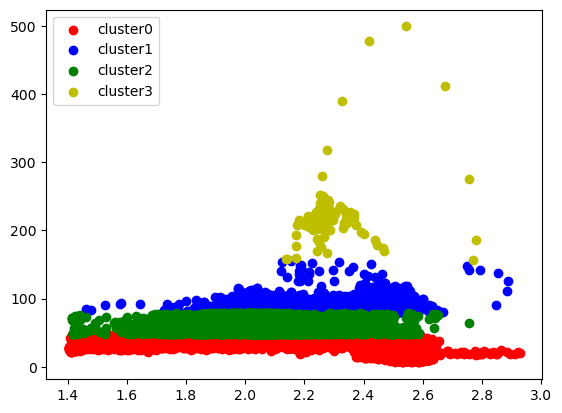

In [63]:
#assigning custom colors to the clusters
colors=['r','b','g','y'] 
for i in range (4):
    cluster_df=X[y_kmeans==i] 
    plt.scatter(cluster_df['RHOB'],
                cluster_df['GR'],
                c=colors[i],
                label=f'cluster{i}') 
    plt.legend()


In [65]:
Y=df[['PEF','DTC']] 
Y.head()

,PEF,DTC
0,20.915468,161.131180
1,19.383013,160.603470
2,22.591518,160.173615
3,32.191910,160.149429
4,38.495632,160.128342


In [67]:
WCSS=[] 
for i in range(1,11): 
    Kmeans=KMeans(n_clusters=i,init='k-means++',
                  max_iter=300,n_init=10,random_state=0) 
    Kmeans.fit(Y) 
    WCSS.append(Kmeans.inertia_)

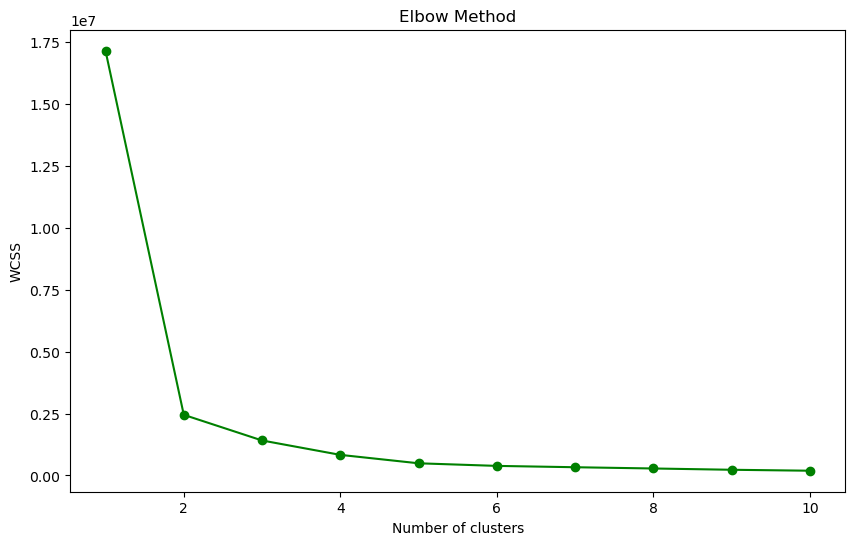

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),WCSS,marker='o',color='g')
plt.title("Elbow Method")
plt.xlabel("Number of clusters") 
plt.ylabel("WCSS") 
plt.show()

In [71]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(Y)

In [73]:
df['cluster 2']=y_kmeans 
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,cluster 1,cluster 2
0,1.884186,80.200851,494.528,0.404547,20.915468,161.131180,1,0
1,1.889794,79.262886,494.680,0.404547,19.383013,160.603470,1,0
2,1.896523,74.821999,494.832,0.404547,22.591518,160.173615,2,0
3,1.891913,72.878922,494.984,0.404547,32.191910,160.149429,2,0
4,1.880034,71.729141,495.136,0.404547,38.495632,160.128342,2,0


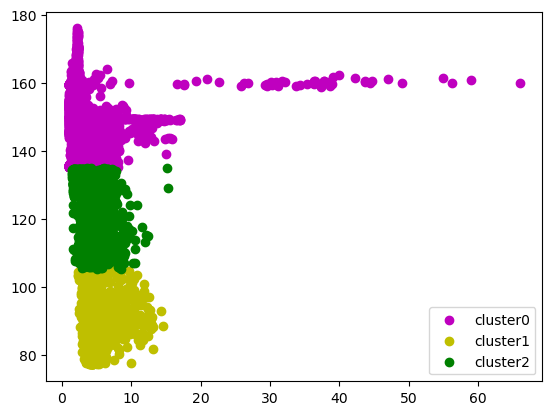

In [75]:
colors=['m','y','g'] 
for i in range (3):
    cluster_df=Y[y_kmeans==i] 
    plt.scatter(cluster_df['PEF'],
                cluster_df['DTC'],
                c=colors[i],
                label=f'cluster{i}') 
    plt.legend()


In [83]:
Z=df[['DEPTH_MD','NPHI']] 
Z.head()

,DEPTH_MD,NPHI
0,494.528,0.404547
1,494.680,0.404547
2,494.832,0.404547
3,494.984,0.404547
4,495.136,0.404547


In [85]:
WCSS=[] 
for i in range(1,11): 
    Kmeans=KMeans(n_clusters=i,init='k-means++',
                  max_iter=300,n_init=10,random_state=0) 
    Kmeans.fit(Z) 
    WCSS.append(Kmeans.inertia_)

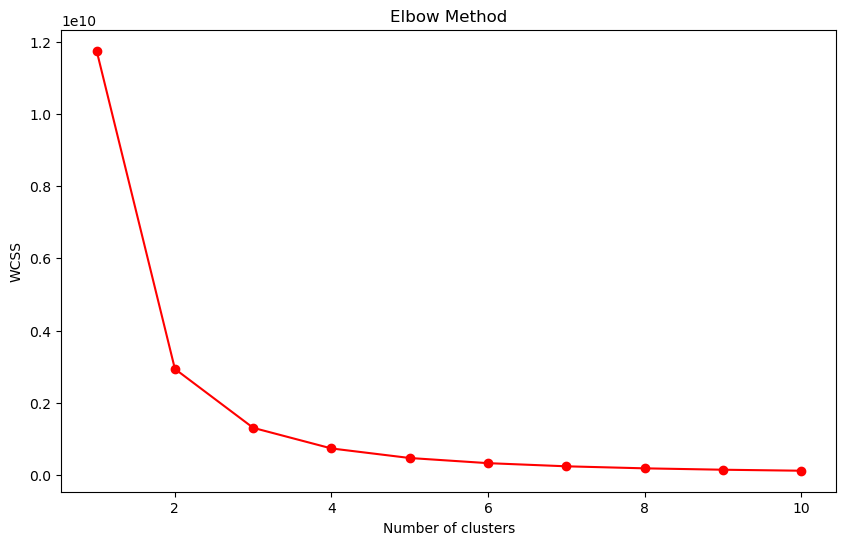

In [87]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),WCSS,marker='o',color='r')
plt.title("Elbow Method")
plt.xlabel("Number of clusters") 
plt.ylabel("WCSS") 
plt.show()

In [89]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(Z)

In [91]:
df['cluster 3']=y_kmeans 
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,cluster 1,cluster 2,cluster 3
0,1.884186,80.200851,494.528,0.404547,20.915468,161.131180,1,0,1
1,1.889794,79.262886,494.680,0.404547,19.383013,160.603470,1,0,1
2,1.896523,74.821999,494.832,0.404547,22.591518,160.173615,2,0,1
3,1.891913,72.878922,494.984,0.404547,32.191910,160.149429,2,0,1
4,1.880034,71.729141,495.136,0.404547,38.495632,160.128342,2,0,1


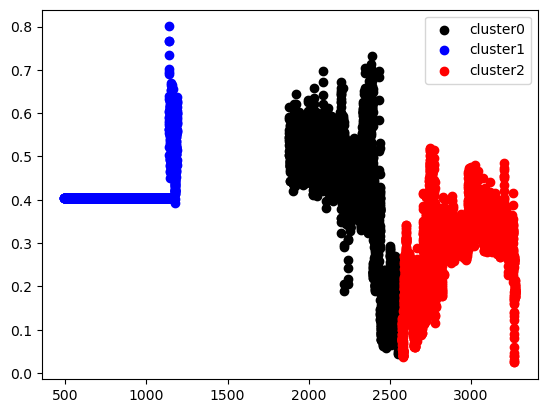

In [109]:
colors=['k','b','r'] 
for i in range (3):
    cluster_df=Z[y_kmeans==i] 
    plt.scatter(cluster_df ['DEPTH_MD'],
                cluster_df ['NPHI'],
                c=colors[i],
                label=f'cluster{i}') 
    plt.legend()


## Step 3: Experiment with different K values and plot the result

In [138]:
A=df[['PEF','DTC']] 
A.head()


,PEF,DTC
0,20.915468,161.131180
1,19.383013,160.603470
2,22.591518,160.173615
3,32.191910,160.149429
4,38.495632,160.128342


In [140]:
WCSS=[] 
for i in range(1,11): 
    Kmeans=KMeans(n_clusters=i,init='k-means++',
                  max_iter=300,n_init=10,random_state=0) 
    Kmeans.fit(A) 
    WCSS.append(Kmeans.inertia_)

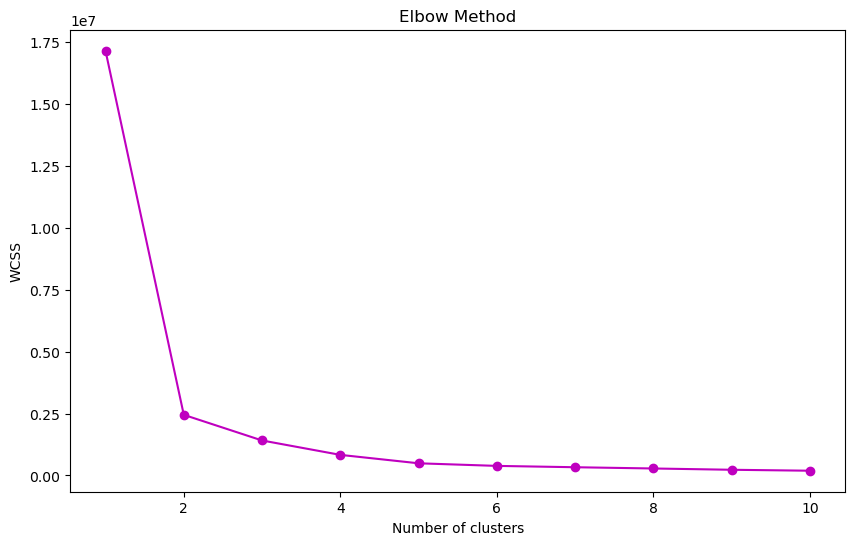

In [142]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),WCSS,marker='o',color='m')
plt.title("Elbow Method")
plt.xlabel("Number of clusters") 
plt.ylabel("WCSS")
plt.show()

## K=2

In [150]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(A)

In [152]:
df['cluster']=y_kmeans 
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,cluster 1,cluster 2,cluster 3,cluster
0,1.884186,80.200851,494.528,0.404547,20.915468,161.131180,1,0,1,0
1,1.889794,79.262886,494.680,0.404547,19.383013,160.603470,1,0,1,0
2,1.896523,74.821999,494.832,0.404547,22.591518,160.173615,2,0,1,0
3,1.891913,72.878922,494.984,0.404547,32.191910,160.149429,2,0,1,0
4,1.880034,71.729141,495.136,0.404547,38.495632,160.128342,2,0,1,0


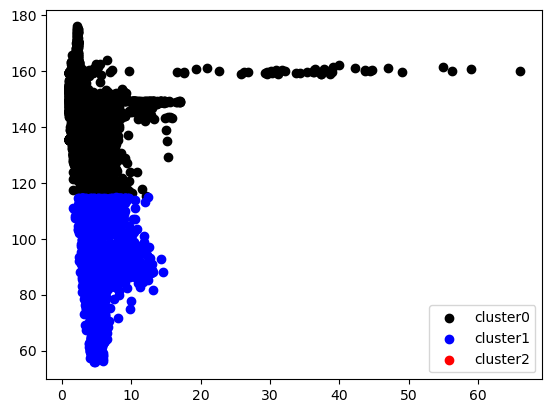

In [156]:
colors=['k','b','r'] 
for i in range (3):
    cluster_df=A[y_kmeans==i] 
    plt.scatter(cluster_df ['PEF'],
                cluster_df ['DTC'],
                c=colors[i],
                label=f'cluster{i}') 
    plt.legend()

### K=3

In [158]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(A)

In [160]:
df['cluster']=y_kmeans 
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,cluster 1,cluster 2,cluster 3,cluster
0,1.884186,80.200851,494.528,0.404547,20.915468,161.131180,1,0,1,1
1,1.889794,79.262886,494.680,0.404547,19.383013,160.603470,1,0,1,1
2,1.896523,74.821999,494.832,0.404547,22.591518,160.173615,2,0,1,1
3,1.891913,72.878922,494.984,0.404547,32.191910,160.149429,2,0,1,1
4,1.880034,71.729141,495.136,0.404547,38.495632,160.128342,2,0,1,1


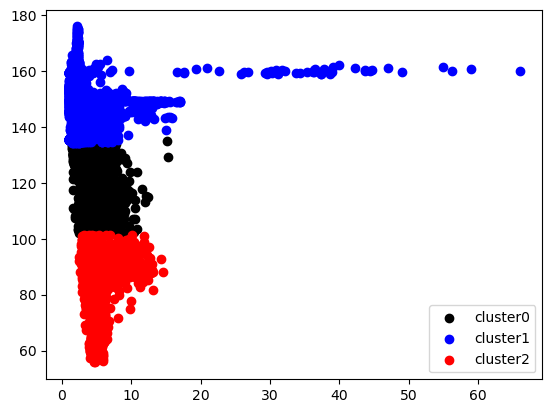

In [162]:
colors=['k','b','r'] 
for i in range (3):
    cluster_df=A[y_kmeans==i] 
    plt.scatter(cluster_df ['PEF'],
                cluster_df ['DTC'],
                c=colors[i],
                label=f'cluster{i}') 
    plt.legend()

### K=4

In [171]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(A)

In [173]:
df['cluster']=y_kmeans 
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,cluster 1,cluster 2,cluster 3,cluster
0,1.884186,80.200851,494.528,0.404547,20.915468,161.131180,1,0,1,0
1,1.889794,79.262886,494.680,0.404547,19.383013,160.603470,1,0,1,0
2,1.896523,74.821999,494.832,0.404547,22.591518,160.173615,2,0,1,0
3,1.891913,72.878922,494.984,0.404547,32.191910,160.149429,2,0,1,0
4,1.880034,71.729141,495.136,0.404547,38.495632,160.128342,2,0,1,0


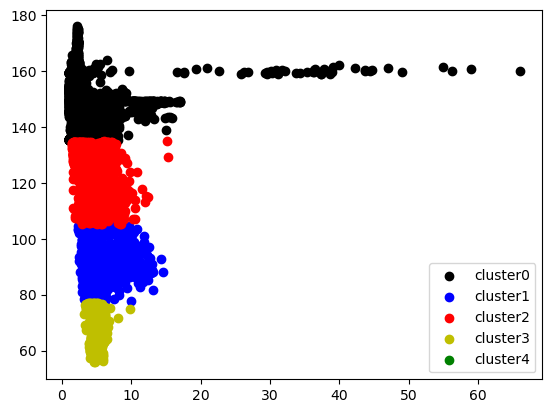

In [179]:
colors=['k','b','r','y','g'] 
for i in range (5):
    cluster_df=A[y_kmeans==i] 
    plt.scatter(cluster_df ['PEF'],
                cluster_df ['DTC'],
                c=colors[i],
                label=f'cluster{i}') 
    plt.legend()

### K=5

In [188]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(A)

In [190]:
df['cluster']=y_kmeans 
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,cluster 1,cluster 2,cluster 3,cluster
0,1.884186,80.200851,494.528,0.404547,20.915468,161.131180,1,0,1,4
1,1.889794,79.262886,494.680,0.404547,19.383013,160.603470,1,0,1,4
2,1.896523,74.821999,494.832,0.404547,22.591518,160.173615,2,0,1,4
3,1.891913,72.878922,494.984,0.404547,32.191910,160.149429,2,0,1,4
4,1.880034,71.729141,495.136,0.404547,38.495632,160.128342,2,0,1,4


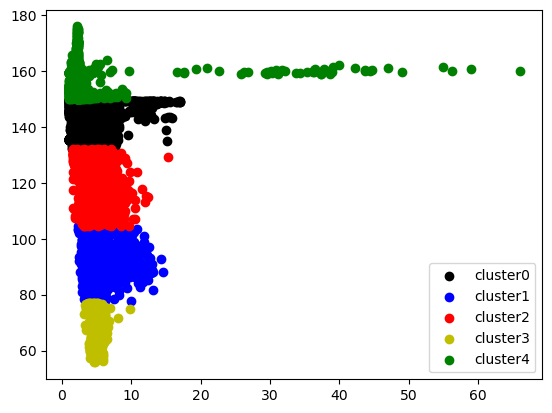

In [192]:
colors=['k','b','r','y','g'] 
for i in range (5):
    cluster_df=A[y_kmeans==i] 
    plt.scatter(cluster_df ['PEF'],
                cluster_df ['DTC'],
                c=colors[i],
                label=f'cluster{i}') 
    plt.legend()

### K=6

In [195]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(A)

In [197]:
df['cluster']=y_kmeans 
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,cluster 1,cluster 2,cluster 3,cluster
0,1.884186,80.200851,494.528,0.404547,20.915468,161.131180,1,0,1,5
1,1.889794,79.262886,494.680,0.404547,19.383013,160.603470,1,0,1,5
2,1.896523,74.821999,494.832,0.404547,22.591518,160.173615,2,0,1,5
3,1.891913,72.878922,494.984,0.404547,32.191910,160.149429,2,0,1,5
4,1.880034,71.729141,495.136,0.404547,38.495632,160.128342,2,0,1,5


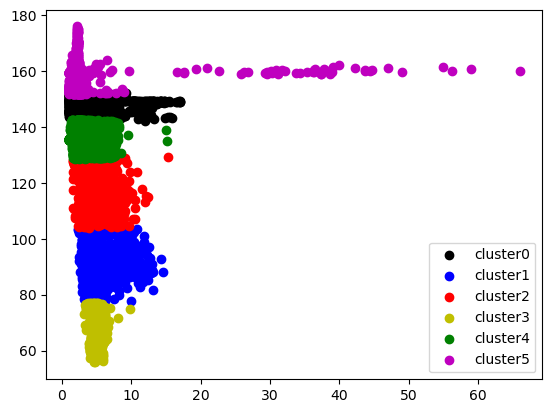

In [199]:
colors=['k','b','r','y','g','m'] 
for i in range (6):
    cluster_df=A[y_kmeans==i] 
    plt.scatter(cluster_df ['PEF'],
                cluster_df ['DTC'],
                c=colors[i],
                label=f'cluster{i}') 
    plt.legend()